Prathamesh Ingale

# Practical 5: Decision trees

## Aim:
Implementation of Decision Tree Using ID3,C4.5,Gini And Naïve
Bayes Classifier



## Theory:

### Decision Tree

In simple words, a decision tree is a structure that contains nodes (rectangular boxes) and edges(arrows) and is built from a dataset (table of columns representing features/attributes and rows corresponding to records). Each node is either used to make a decision (known as decision node) or represent an outcome (known as leaf node).

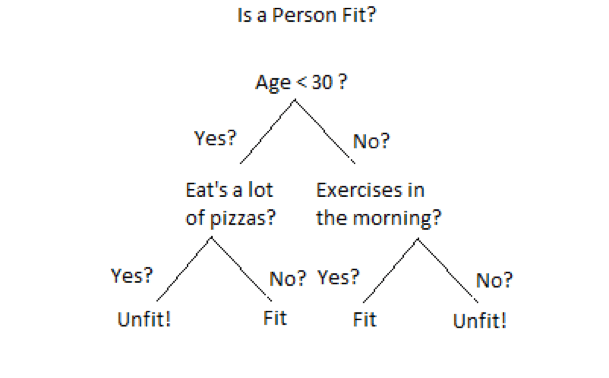

### ID3

ID3 stands for Iterative Dichotomiser 3 and is named such because the algorithm iteratively (repeatedly) dichotomizes(divides) features into two or more groups at each step. Invented by Ross Quinlan, ID3 uses a top-down greedy approach to build a decision tree. In simple words, the top-down approach means that we start building the tree from the top and the greedy approach means that at each iteration we select the best feature at the present moment to create a node. Most generally ID3 is only used for classification problems with nominal features only.

### C4.5

C 4.5 is the successor of ID3 and was developed by Ross Quinlan. It is also a decision tree algorithm that uses the top-down greedy approach with a few differences in the splitting criteria. C 4.5 uses the concept of information gain ratio to overcome the problem of bias towards attributes with a large number of values. It also uses pruning to avoid overfitting. C 4.5 can be used for both classification and regression problems. It can also be used for both nominal and continuous features. C 4.5 is the most popular decision tree algorithm and is still widely used. It is also the default algorithm used in the Weka tool. C 4.5 is also known as J48 in Weka’s implementation. C 4.5 is an extension of ID3 and the only difference between them is that C 4.5 can handle both continuous and discrete attributes while ID3 can only handle discrete attributes. C 4.5 uses the concept of information gain ratio to overcome the problem of bias towards attributes with a large number of values. It also uses pruning to avoid overfitting.

**Naive Bayes:**

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e., every pair of features being classified is independent of each other.Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred. Bayes’ theorem is stated mathematically as the following equation:

P(A|B) = P(B|A) * P(A) / P(B)

where A and B are events and P(B) ≠ 0.

 - Basically, we are trying to find the probability of event A, given the event B is true.Event B is also termed as evidence.
 - P(A) is the priori of A (the prior probability, i.e., Probability of event before evidence is seen). The evidence is an attribute value of an unknown instance(here, it is event B).
 -  P(A|B) is a posteriori probability of B, i.e., probability of event after evidence is seen.

### ID3

In [2]:
import numpy as prathamesh_np #linear algebra
import pandas as prathamesh_pd #data processing
from sklearn.preprocessing import LabelEncoder #if data is string then use it to preprocess the data
from sklearn.tree import DecisionTreeClassifier

In [3]:
#Reading the dataset:
df = prathamesh_pd.read_csv('Walmart.csv')
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 352.0 KB


In [6]:
df['Unemployment'] = df['Unemployment'].astype(int)

In [9]:
#Extracting Features:
x = df.iloc[:,:-1]
y = df.iloc[:,6]

In [10]:
dt = DecisionTreeClassifier(criterion = "entropy")
dt

DecisionTreeClassifier(criterion='entropy')

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,
test_size = .3, random_state = 0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred

array([12,  8,  6, ...,  6,  9,  6])

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   0   0   0   0   0   0   0   0   0   0   0]
 [  1  55   1   0   1   0   5   0   0   0   0   0]
 [  0   0 118  10   3   0   0   0   0   0   0   0]
 [  0   0   5 320   4   1   0   0   0   0   0   0]
 [  0   0   0  15 454  17   1   4   0   0   0   0]
 [  0   0   0   1   8 569   7   0   0   0   0   0]
 [  0   0   0   1   0   2 142   2   0   0   0   3]
 [  0   0   1   1   4   0   4  62   0   0   0   4]
 [  0   0   0   0   0   0   0   0  10   0   0   0]
 [  0   0   0   0   0   0   0   0   0  18   0   0]
 [  0   0   0   1   0   0   0   0   0   0  27   0]
 [  0   0   0   0   4   0   1   0   0   0   0  44]]


In [13]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0
for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the ID3 is: ', corrPred/(cm.sum()))

Correct predictions:  1819
False predictions 112


Accuracy of the ID3 is:  0.9419989642672191


### C4.5

In [14]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [15]:
iris = load_iris()

In [16]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)

In [17]:
r = export_text(decision_tree,
feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



### Naive Bayes

In [18]:
import numpy as prathamesh_np
import pandas as prathamesh_pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.datasets import load_iris
iris = load_iris()

In [21]:
X = iris.data
y = iris.target
dataset = prathamesh_pd.read_csv('golf-df.csv')

In [22]:
dataset.head()

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [23]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.4, random_state=1)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [26]:
y_pred = gnb.predict(X_test)
print(y_pred)

[0 1 1 0 2 2 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1 2 0 0 0 1 0 0 2 2 2 2 2 1 2 1]


In [27]:
# comparing actual response values (y_test) with predicted response values (y_pred)
y_compare = prathamesh_np.vstack((y_test,y_pred)).T
y_compare[:5,:]

array([[0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2]])

In [28]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[19  0  0]
 [ 0 19  2]
 [ 0  1 19]]


In [29]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0
for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))

Correct predictions:  57
False predictions 3


Accuracy of the Naive Bayes Clasification is:  0.95


## Conclusion
We have learnt and implemented decision tree using ID3, C4.5 and Naïve Bayes Classification in python.